
# runge_kutta_4_circular_motion_xy
Circular motion in xy coordinate with velocity Runge-Kutta 4 method.

## magnetic force on moving charge

In [1]:
import math

def fv(t, v, B):
    vx = v[0]
    vy = v[1]
    vz = v[2]
    
    Bx = B[0]
    By = B[1]
    Bz = B[2]
    
    ax = q * (vy * Bz - vz * By)
    ay = q * (vz * Bx - vx * Bz)
    az = q * (vx * By - vy * Bx)
    
    return ax, ay, az

Bx = 0
By = 0
Bz = -1
B = math.sqrt(Bx**2 + By**2 + Bz**2)

q = 1
m = 1

vx = 0
vy = 1
vz = 0
v = math.sqrt(vx**2 + vy**2 + vz**2)

R = (m * v) / (q * B)
x = R
y = 0
z = 0

T = 2 * math.pi * R / v
tbeg = 0
tend = 2 * T
N = 100
dt = (tend - tbeg) / N

t = 0
tt = []
xx = []
yy = []
zz = []
for i in range(N + 1):
    t = i * dt
    
    k1x, k1y, k1z = fv(t, [vx, vy, vz], [Bx, By, Bz])
    k2x, k2y, k2z = fv(t + dt/2, [vx + k1x/2 * dt, vy + k1y/2 * dt, vz + k1z/2 * dt], [Bx, By, Bz])
    k3x, k3y, k3z = fv(t + dt/2, [vx + k2x/2 * dt, vy + k2y/2 * dt, vz + k2z/2 * dt], [Bx, By, Bz])
    k4x, k4y, k4z = fv(t + dt, [vx + k3x * dt, vy + k3y * dt, vz + k3z * dt], [Bx, By, Bz])
    
    vx = vx + (k1x + 2 * k2x + 2 * k3x + k4x) * dt / 6
    vy = vy + (k1y + 2 * k2y + 2 * k3y + k4y) * dt / 6
    vz = vz + (k1z + 2 * k2z + 2 * k3z + k4z) * dt / 6
    
    x = x + vx * dt
    y = y + vy * dt
    z = z + vz * dt
    
    tt.append(t)
    xx.append(x)
    yy.append(y)
    zz.append(z)

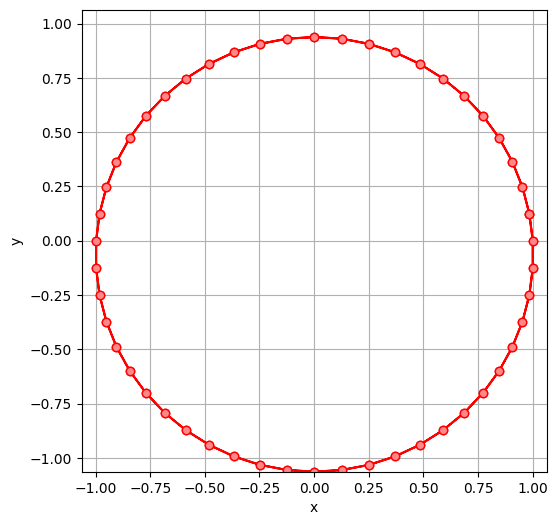

In [2]:
xmax = max(abs(min(xx)), max(xx))
ymax = max(abs(min(yy)), max(yy))
xymax = max(xmax, ymax)

import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
plt.xlim([-xymax, xymax])
plt.ylim([-xymax, xymax])
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.plot(xx, yy, 'ro-', mfc='#f88')
plt.show()

It produces better result compared to [Euler algorithm](euler_circular_motion_xy.ipynb) and also [velocity Verlet](velocity_verlet_circular_motion_xy.ipynb) for this case.